In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape,test.shape)
train.head()

(463291, 15) (128858, 14)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [2]:
train.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [3]:
train.dtypes

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [4]:
train.apply(lambda x: len(x.unique()))

session_id                463291
DateTime                    8610
user_id                   150347
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
product_category_2            30
user_group_id                 14
gender                         3
age_level                      8
user_depth                     4
city_development_index         5
var_1                          2
is_click                       2
dtype: int64

In [5]:
train.replace(('Male','Female'),(0.3,0.2), inplace = True)

In [6]:
test.replace(('Male','Female'),(0.3,0.2), inplace = True)

In [7]:
train['var_1'].value_counts()

0    267704
1    195587
Name: var_1, dtype: int64

In [8]:
train['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

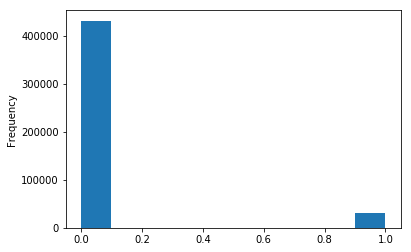

In [9]:
train["is_click"].astype(int).plot.hist()

In [10]:
# Dropping the un-necessary columns as well as those columns who have large number of missing values
train.drop(['DateTime','user_id','product_category_2'], axis = 1,inplace = True)
test.drop(['DateTime','user_id','product_category_2'], axis = 1, inplace = True)

In [11]:
# Finding co-relation of variables between target values
corelation = train.corr()['is_click'].sort_values()
corelation

product_category_1       -0.016531
session_id               -0.011598
age_level                -0.009681
user_group_id            -0.007815
city_development_index   -0.005686
user_depth               -0.000952
gender                    0.004460
var_1                     0.011296
campaign_id               0.011447
webpage_id                0.041717
is_click                  1.000000
Name: is_click, dtype: float64

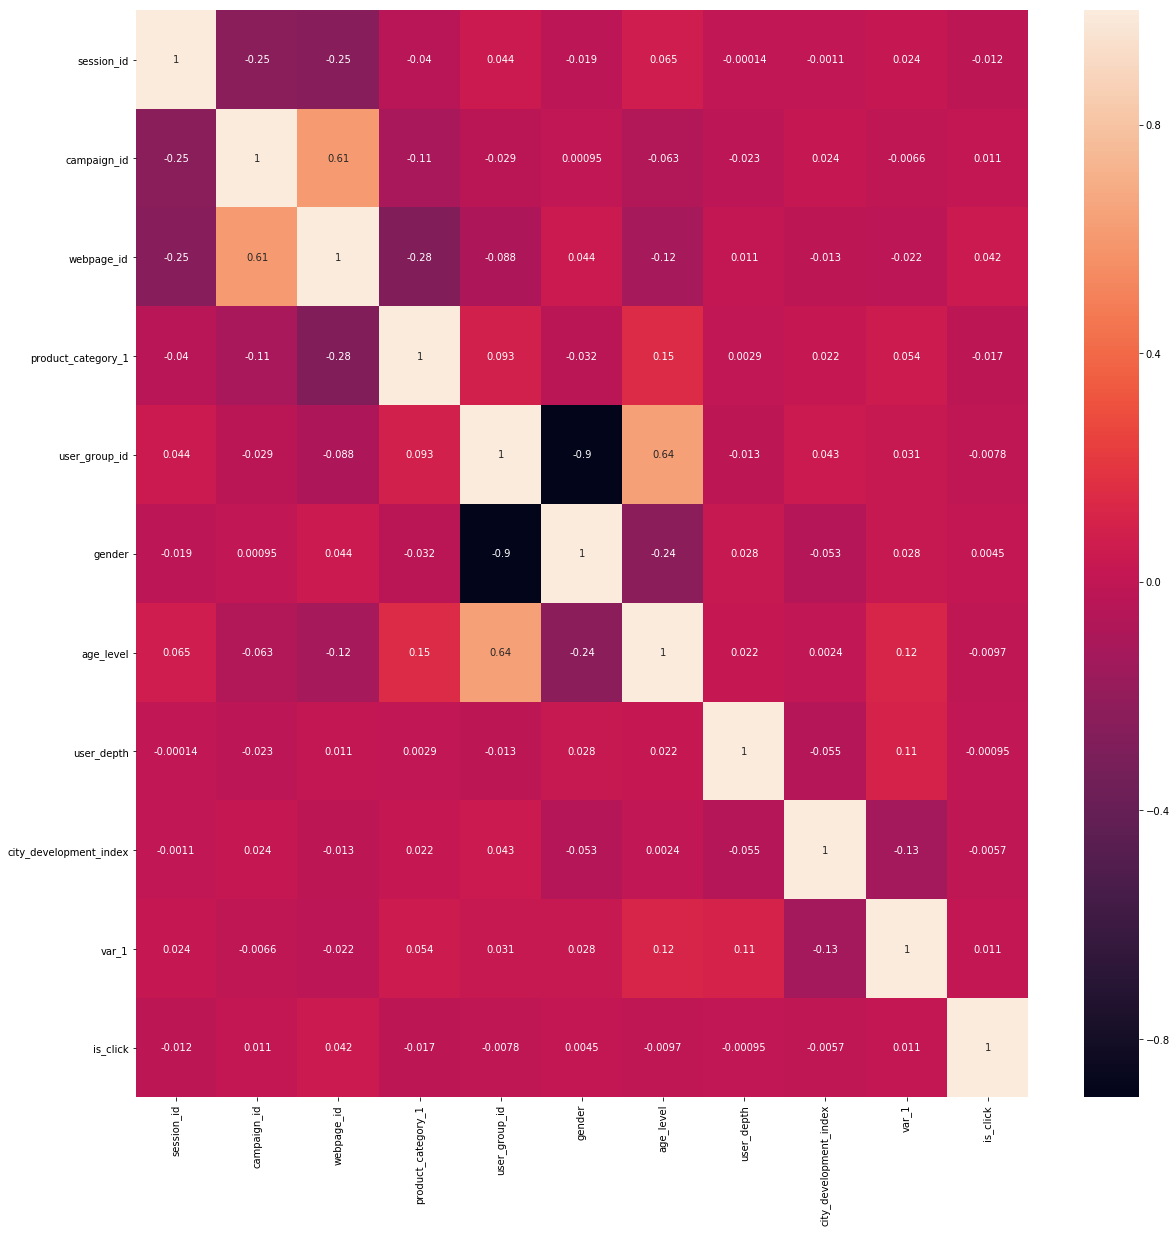

In [11]:
# Finding co-relation and plotting a heatmap diagram
cormat = train.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
#Plot heatmap
sns.heatmap(train[top_corr_features].corr(), annot = True)

# Visualizing and Analyzing Data through Plotting different graph 

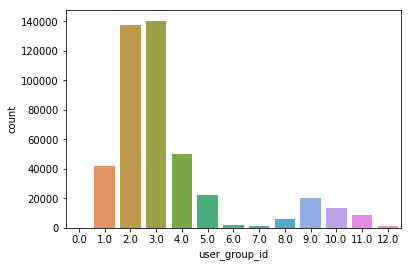

In [12]:
sns.countplot(x = "user_group_id", data = train)

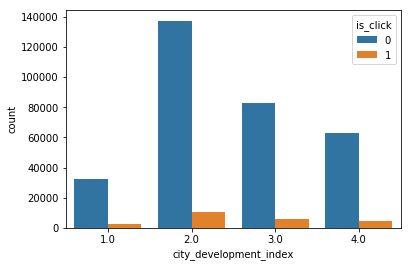

In [13]:
sns.countplot(x = "city_development_index", hue = "is_click", data = train)

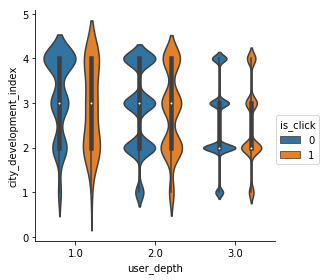

In [14]:
sns.factorplot(x ="user_depth",y ="city_development_index",hue = "is_click", kind = "violin" ,data = train)

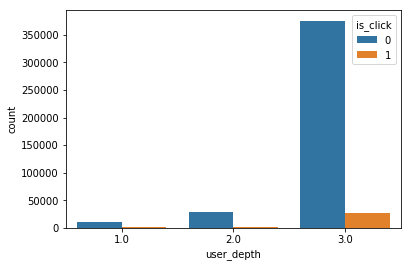

In [15]:
sns.countplot(x = "user_depth", hue = "is_click", data = train)

In [16]:
# Imputing the missing values in column
for col in('user_group_id','gender','age_level','user_depth', 'city_development_index'):
    train[col].fillna(train[col].mode()[0], inplace = True)

In [17]:
# Imputting the missing values in columns of test dataset
for col in('user_group_id','gender','age_level','user_depth','city_development_index'):
    test[col].fillna(test[col].mode()[0], inplace = True)

In [18]:
train.isnull().sum()

session_id                0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [19]:
train['product'].value_counts()

C    163501
H    109574
I     63711
D     41064
B     22479
E     21452
A     15391
J      9698
G      9414
F      7007
Name: product, dtype: int64

In [20]:
train.replace(('A','B','C','D','E','F','G','H','I','J'),(0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19), inplace = True)

In [21]:
test.replace(('A','B','C','D','E','F','G','H','I','J'),(0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19), inplace = True)

In [22]:
test.isnull().sum()

session_id                0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
dtype: int64

In [23]:
train.dtypes

session_id                  int64
product                   float64
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
user_group_id             float64
gender                    float64
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [24]:
test.dtypes

session_id                  int64
product                   float64
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
user_group_id             float64
gender                    float64
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
dtype: object

In [25]:
X_train = train.drop(['session_id','is_click'],axis = 1)
Y_train = train['is_click']
X_test = test.drop(['session_id'],axis = 1).copy()

# Feature Selection through different Technique

In [26]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
# Applying SelectKbest class to extract 10 most best features
bestfeatures = SelectKBest(score_func = chi2,k=5)

In [27]:
fit = bestfeatures.fit(X_train,Y_train)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#Concat two DataFrame for better Visualization
Featurescore = pd.concat([dfcolumns,dfscores], axis = 1)
Featurescore.columns = ['Specs','Scores'] # Naming the dataframe columns
print(Featurescore.nlargest(8,'Scores')) # Print 8 best Feature scores

                    Specs        Scores
2              webpage_id  1.260384e+07
1             campaign_id  3.149862e+06
3      product_category_1  7.009508e+01
4           user_group_id  4.470761e+01
9                   var_1  3.415695e+01
6               age_level  1.615983e+01
8  city_development_index  2.954215e+00
5                  gender  3.193177e-02


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
print(model.feature_importances_) # use inbuilt class feature importances of tree based classifier

[0.20249401 0.06097217 0.0817106  0.0902883  0.10811732 0.01412076
 0.10253133 0.10857274 0.19019335 0.04099943]


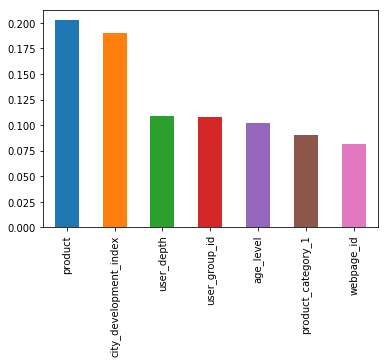

In [31]:
# plot grpah of feature importnaces for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind = 'bar')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector 

In [34]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1),
                                            k_features = 7,forward = True,verbose = 2,scoring = 'roc_auc', cv = 3)

In [35]:
features = feature_selector.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.6s finished

[2019-01-10 02:57:23] Features: 1/7 -- score: 0.5627766416695689[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min finished

[2019-01-10 02:58:40] Features: 2/7 -- score: 0.5662636681489487[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min finished

[2019-01-10 02:59:56] Features: 3/7 -- score: 0.5694127085048559[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min finished

[2019-01-10 03:01:17] Features: 4/7 -- score: 0.567566225875041[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min 

In [36]:
filter_feature = X_train.columns[list(features.k_feature_idx_)]
filter_feature

Index(['product', 'campaign_id', 'webpage_id', 'product_category_1', 'gender',
       'user_depth', 'var_1'],
      dtype='object')

In [37]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1),
                                            k_features = 7,forward = False,verbose = 2,scoring = 'roc_auc', cv = 3)

In [38]:
features = feature_selector.fit(np.array(X_train.fillna(0)),Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.5min finished

[2019-01-10 03:10:58] Features: 9/7 -- score: 0.5525213027293145[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished

[2019-01-10 03:13:23] Features: 8/7 -- score: 0.5566745391259448[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min finished

[2019-01-10 03:15:21] Features: 7/7 -- score: 0.5591012935039645

In [39]:
filtered_features = X_train.columns[list(features.k_feature_idx_)]
filtered_features

Index(['campaign_id', 'webpage_id', 'product_category_1', 'gender',
       'age_level', 'user_depth', 'var_1'],
      dtype='object')

In [40]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector  
#feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),  
#           min_features=2,
#           max_features=4,
#           scoring='roc_auc',
#           print_progress=True,
#           cv=2)

In [41]:
#features = feature_selector.fit(np.array(X_train.fillna(0)), Y_train)  

In [42]:
#filtered_features= X_train.columns[list(features.k_feature_idx_)]  
#filtered_features

# Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
max_depth = [15,30,60,120]
min_samples_leaf = [3,15,25,45]
param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
D_T = DecisionTreeClassifier()
grid = GridSearchCV(estimator = D_T,param_grid = param_grid, cv = 3)
start_time = time.time()
grid_result = grid.fit(X_train,Y_train)

In [44]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: 0.932373 using {'max_depth': 15, 'min_samples_leaf': 15}


In [45]:
print("Execution Time:"+str((time.time()-start_time))+'ms')

Execution Time:237.58578252792358ms


In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300,num = 5)]
# Number of features consider at every split  split
max_features = ['auto','sqrt']
# Maximum number of level in tree
max_depth = [int (x) for x in np.linspace(10,110,num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at leaf node
min_samples_leaf = [1,4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 63.1min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [36]:
forest = RandomForestClassifier(n_estimators = 250,min_samples_split = 2,min_samples_leaf = 4,
                                max_features = 'sqrt',max_depth = 110,bootstrap = True)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
Rndom_score = round(forest.score(X_train,Y_train)*100,2)
Rndom_score

93.24

In [38]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest,X_train,Y_train,cv = 3)
score

array([0.93237109, 0.93237109, 0.93237669])

In [39]:
print(score.mean())

0.9323729578331247
